In [1]:
# install hmmer library
!sudo apt-get install hmmer
!sudo apt-get install hmmer-doc
!sudo apt-get install ncbi-blast+

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libdivsufsort3
Suggested packages:
  hmmer-doc
The following NEW packages will be installed:
  hmmer libdivsufsort3
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,198 kB of archives.
After this operation, 7,621 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libdivsufsort3 amd64 2.0.1-5 [42.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 hmmer amd64 3.3.2+dfsg-1 [1,155 kB]
Fetched 1,198 kB in 2s (790 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requ

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the 3D structure
CSV files of PF00014 domains are based on two different queries.

```
( Identifier = "PF00014" AND Annotation Type = "Pfam" ) AND Data Collection Resolution < 3 AND Polymer Entity Sequence Length = [ 50 - 80 ] AND Polymer Entity Mutation Count < 10
```
and
```
 ( Identifier = "PF00014" AND Annotation Type = "Pfam" ) AND Data Collection Resolution < 2 AND Polymer Entity Sequence Length = [ 50 - 80 ] AND Polymer Entity Mutation Count < 2
 ```
 the difference are the `Resolution(3Å vs 2Å)`, `Polymer Entity Mutation Count(10 vs 2)` and at the end `grouping the polymer entities with different sequence identity(100% vs 50%)`.

 The stricter criteria, with a resolution of 2Å, a mutation count of less than 2, and a sequence identity of 100%, may lead to a smaller sample size but potentially higher quality data, while the less strict criteria, with a resolution of 3Å, a mutation count of less than 10, and a sequence identity of 50%, could yield a larger sample size but with a risk of including lower quality data. With the stricter rules, we have obtained 14 samples, whereas with the less strict rule, we have collected 28 samples. Additionally, we aim to assess which set of criteria—either the more stringent or the less restrictive—ultimately yields superior results in terms of sample quality and relevance to our research objectives.

Now we can download the tabular CSV files which contain `Entity ID`, `Sequence`, `Auth Asym ID`

In [3]:
!wget -O strict_seq.csv "https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/strict.csv"
!wget -O not_strict_seq.csv "https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/not_strict.csv"

--2024-05-18 09:59:14--  https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/strict.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/heispv/bioinformatics/master/lab-of-bioinformatics/project_files/strict.csv [following]
--2024-05-18 09:59:14--  https://raw.githubusercontent.com/heispv/bioinformatics/master/lab-of-bioinformatics/project_files/strict.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1190 (1.2K) [text/plain]
Saving to: ‘strict_seq.csv’

strict_seq.csv      100%[===================>]   1.16K  --.-KB/s    in 0s      

2024-05-18 09:59:14 (57.

## Clean csv file

In [4]:
import pandas as pd

def clean_csv_file(path: str, output_file_name: str, string_or_file: str = 'f', save_format: str = 'f') -> str or None:
    """
    Reads and cleans a CSV file, providing options to return the cleaned data as a string or save it into a file.

    Parameters:
        path (str): The path to the CSV file to be cleaned.
        output_file_name (str): The name of the output file. Defaults to "output_seq".
        string_or_file (str): Determines whether to return the cleaned data as a string ('s') or save it into a file ('f'). Defaults to 'f'.
        save_format (str): Determines the format for saving the data into a file. For keys ('k') or Fasta format ('f'). Defaults to 'f'.

    Returns:
        str or None: If the user chooses to get the results as a variable ('s'),
        the cleaned data is returned as a string. If the user chooses to save the
        results into a file ('f'), the cleaned data is saved into a file.
    """
    print('-' * 40)
    print(f'Reading CSV file from {path}...')
    df = pd.read_csv(path)
    print(f'Initial number of records: {len(df)}')
    print('-' * 40)

    # Drop rows with missing 'Entity ID' and update 'Entity ID' format
    df = df.dropna(subset=['Entity ID'])
    print(f'Number of records after dropping missing Entity ID: {len(df)}')
    df['Entity ID'] = df['Entity ID'].str.split('_').str[0] + ':' + df['Auth Asym ID']
    df = df.drop(columns=['Auth Asym ID'])
    df = df.reset_index(drop=True)

    # Option to return the cleaned data as a string
    if string_or_file == 's':
        cleaned_data = '\n'.join(df['Entity ID'].values)
        print('-' * 40)
        print('Returning cleaned data as a string.')
        return cleaned_data

    # Option to save the cleaned data to a file
    elif string_or_file == 'f':
        if save_format == 'f':
            output_path = output_file_name + '.fasta'
            with open(output_path, 'w') as file:
                for idx, row in df.iterrows():
                    file.write(f"> {row['Entity ID']}\n{row['Sequence']}\n")
            print(f'Data saved to {output_path}')
        elif save_format == 'k':
            output_path = output_file_name + '.txt'
            with open(output_path, 'w') as f:
                f.write('\n'.join(df['Entity ID'].values))
            print(f'Data saved to {output_path}')
        print('-' * 40)
        return None


In [5]:
clean_csv_file(
    path='strict_seq.csv',
    output_file_name='strict_seqs',
    string_or_file='f',
    save_format='f'
    )

----------------------------------------
Reading CSV file from strict_seq.csv...
Initial number of records: 30
----------------------------------------
Number of records after dropping missing Entity ID: 15
Data saved to strict_seqs.fasta
----------------------------------------


In [6]:
clean_csv_file(
    path='not_strict_seq.csv',
    output_file_name='not_strict_seqs',
    string_or_file='f',
    save_format='f'
    )

----------------------------------------
Reading CSV file from not_strict_seq.csv...
Initial number of records: 49
----------------------------------------
Number of records after dropping missing Entity ID: 28
Data saved to not_strict_seqs.fasta
----------------------------------------


In [7]:
!cat strict_seqs.fasta | head -n 10

> 1AAP:A
VREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSA
> 1KTH:A
ETDICKLPKDEGTCRDFILKWYYDPNTKSCARFWYGGCGGNENKFGSQKECEKVCAPV
> 1ZR0:B
PTGNNAEICLLPLDYGPCRALLLRYYYDRYTQSCRQFLYGGCEGNANNFYTWEACDDACWRIE
> 3BYB:A
KDRPDFCELPADTGPCRVRFPSFYYNPDEKKCLEFIYGGCEGNANNFITKEECESTCAA
> 3M7Q:B
EAEASICSEPKKVGRCKGYFPRFYFDSETGKCTPFIYGGCGGNGNNFETLHQCRAICRALG


We can use the same function which we used to clean the csv file, to only extract the ids of the sequences. these ids are going to be used as input files in the PDBeFold website to get Multiple Seqence Alignment based on Multiple Structure Alignemt.

In [8]:
# Get sequence ids as .txt file for the PDBeFold input
clean_csv_file(
    path='strict_seq.csv',
    output_file_name='strict_ids',
    string_or_file='f',
    save_format='k'
    )

----------------------------------------
Reading CSV file from strict_seq.csv...
Initial number of records: 30
----------------------------------------
Number of records after dropping missing Entity ID: 15
Data saved to strict_ids.txt
----------------------------------------


In [9]:
# Get sequence ids as .txt file for the PDBeFold input
clean_csv_file(
    path='not_strict_seq.csv',
    output_file_name='not_strict_ids',
    string_or_file='f',
    save_format='k'
    )

----------------------------------------
Reading CSV file from not_strict_seq.csv...
Initial number of records: 49
----------------------------------------
Number of records after dropping missing Entity ID: 28
Data saved to not_strict_ids.txt
----------------------------------------


Files `strict_ids.txt` and `not_strict_ids.txt` are uploaded into the [PDBeFold](https://www.ebi.ac.uk/msd-srv/ssm/cgi-bin/ssmserver) and the results are saved in my Github repository.

In [10]:
!rm not_strict_seq.csv strict_seq.csv

## Get MSA

In [11]:
# Getting the multiple sequence alignment from github repo
!wget -O strict_msa.txt "https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/strict_msa.txt"

--2024-05-18 09:59:15--  https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/strict_msa.txt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/heispv/bioinformatics/master/lab-of-bioinformatics/project_files/strict_msa.txt [following]
--2024-05-18 09:59:15--  https://raw.githubusercontent.com/heispv/bioinformatics/master/lab-of-bioinformatics/project_files/strict_msa.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1918 (1.9K) [text/plain]
Saving to: ‘strict_msa.txt’

strict_msa.txt      100%[===================>]   1.87K  --.-KB/s    in 0s      

2024-05-18 0

In [12]:
!wget -O not_strict_msa.txt "https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/not_strict_msa.txt"

--2024-05-18 09:59:16--  https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/not_strict_msa.txt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/heispv/bioinformatics/master/lab-of-bioinformatics/project_files/not_strict_msa.txt [following]
--2024-05-18 09:59:16--  https://raw.githubusercontent.com/heispv/bioinformatics/master/lab-of-bioinformatics/project_files/not_strict_msa.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4029 (3.9K) [text/plain]
Saving to: ‘not_strict_msa.txt’

not_strict_msa.txt  100%[===================>]   3.93K  --.-KB/s    in 0s    

In [13]:
!rm strict_ids.txt not_strict_ids.txt

### Build HMM based on the raw MSA

In [14]:
# Create an HMM model based on the strict_msa.txt file
!hmmbuild strict_msa_not_clean.hmm strict_msa.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             strict_msa.txt
# output HMM file:                  strict_msa_not_clean.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     strict_msa              15    63    57     2.35  0.976 

# CPU time: 0.04u 0.00s 00:00:00.04 Elapsed: 00:00:00.04


In [15]:
# Create an HMM model based on the not_strict_msa.txt file
!hmmbuild not_strict_msa_not_clean.hmm not_strict_msa.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             not_strict_msa.txt
# output HMM file:                  not_strict_msa_not_clean.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     not_strict_msa          28    80    59     3.28  0.945 

# CPU time: 0.03u 0.00s 00:00:00.03 Elapsed: 00:00:00.04


In [16]:
!cat strict_msa_not_clean.hmm | head -n 22

HMMER3/f [3.3.2 | Nov 2020]
NAME  strict_msa
LENG  57
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Sat May 18 09:59:16 2024
NSEQ  15
EFFN  2.354736
CKSUM 1225978556
STATS LOCAL MSV       -8.8676  0.71902
STATS LOCAL VITERBI   -9.0620  0.71902
STATS LOCAL FORWARD   -4.0485  0.71902
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.60263  2.73612  3.07114  2.69296  2.83763  2.63193  3.88604  3.41319  2.66892  3.03622  4.07894  2.70680  3.44272  3.07560  2.87241  2.77771  2.91062  3.13755  4.62504  2.85507
          2.68622  4.42249  2.77475  2.73061  3.46378  2.40519  3.72518  3.29307  2.67748  2.69379  4.24714  2.90341  2.73739  3.18170  2.89777  2.37911  2.77518  2.98542  4.58501  3.61527
          0.72401  0.99536  1.92687  0.72737  0.66006  0.000

In [17]:
!cat not_strict_msa_not_clean.hmm | head -n 22

HMMER3/f [3.3.2 | Nov 2020]
NAME  not_strict_msa
LENG  59
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Sat May 18 09:59:17 2024
NSEQ  28
EFFN  3.284668
CKSUM 1929399890
STATS LOCAL MSV       -8.9836  0.71896
STATS LOCAL VITERBI   -9.1716  0.71896
STATS LOCAL FORWARD   -4.2058  0.71896
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.66045  2.92817  3.06444  2.66755  2.75405  2.64152  3.84570  3.40036  2.59333  3.03034  4.07046  2.68786  3.42610  3.06466  2.78686  2.80020  2.93294  3.20393  4.59062  2.86329
          2.68661  4.42268  2.77530  2.73007  3.46397  2.40541  3.72365  3.29271  2.67756  2.69368  4.24660  2.90390  2.73730  3.18114  2.89805  2.37919  2.77491  2.98562  4.58371  3.61546
          1.18984  1.11301  1.00195  1.14078  0.38503  0

Based on the files above, we can observe that the `hmmbuild` command, applied to the `strict_msa.txt` file, cuts the first `5` characters in the sequence while when using the `not_strict_msa.txt` it cuts the first `20` character. This action is taken because there are not enough amino acids to build the Hidden Markov Model (HMM) for that part of the sequence. Therefore, we will trim each sequence and then reapply the `hmmbuild` command.

## Clean raw MSA

In [18]:
def clean_msa(path: str, first_clipping_num: int, output_file_name: str) -> None:
    """
    Clean MSA file by removing specified number of characters from the beginning of each sequence.

    Args:
        path (str): Path to the input MSA file.
        first_clipping_num (int): Number of characters to remove from the beginning of each sequence.
        output_file_name (str): Name of the output file.

    Returns:
        None

    This function reads a MSA file, extracts the sequence IDs and sequences, removes the specified
    number of characters from the beginning of each sequence, and writes the cleaned sequences to a new file.
    """
    print('-' * 40)
    print(f'Reading MSA file from {path}...')
    with open(path) as f:
        fastas = f.read().strip().split('\n\n')
    print(f'Number of sequences found: {len(fastas)}')
    print('-' * 40)

    clean_list = []
    for fasta in fastas:
        id = fasta.split()[0]
        sequence = ''.join(fasta.split('\n')[1:])
        clean_list.append((id, sequence))

    print(f'Removing the first {first_clipping_num} characters from each sequence...')
    with open(output_file_name + '.txt', 'w') as f:
        for item in clean_list:
            f.write(f"{item[0]}\n{item[1][first_clipping_num:]}\n")
    print('-' * 40)

    print(f'Output saved in {output_file_name}.txt')
    print('-' * 40)


In [19]:
clean_msa(
    path='strict_msa.txt',
    first_clipping_num=5,
    output_file_name='clean_strict_msa'
    )

----------------------------------------
Reading MSA file from strict_msa.txt...
Number of sequences found: 15
----------------------------------------
Removing the first 5 characters from each sequence...
----------------------------------------
Output saved in clean_strict_msa.txt
----------------------------------------


In [20]:
clean_msa(
    path='not_strict_msa.txt',
    first_clipping_num=20,
    output_file_name='clean_not_strict_msa'
    )

----------------------------------------
Reading MSA file from not_strict_msa.txt...
Number of sequences found: 28
----------------------------------------
Removing the first 20 characters from each sequence...
----------------------------------------
Output saved in clean_not_strict_msa.txt
----------------------------------------


In [21]:
# Check the strict_msa.tx file
!cat clean_strict_msa.txt | head -n 20

>PDB:1aap:A
revcseqaetgpcrAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCg---
>PDB:1kth:A
tdicklpkdegtcrDFILKWYYDPNTKSCARFWYGGCGGNENKFGSQKECEKVCapv-
>PDB:1zr0:B
aeicllpldygpcrALLLRYYYDRYTQSCRQFLYGGCEGNANNFYTWEACDDACwrie
>PDB:3byb:A
pdfcelpadtgpcrVRFPSFYYNPDEKKCLEFIYGGCEGNANNFITKEECESTCa---
>PDB:3m7q:B
asicsepkkvgrckGYFPRFYFDSETGKCTPFIYGGCGGNGNNFETLHQCRAICralg
>PDB:3wny:C
pafcleppyagpgkARIIRYFYNAKAGAAQAFVYGGVRAKRNNFASAADALAACaa--
>PDB:4dtg:K
pdfcfleedpgicrGYITRYFYNNQTKQCERFKYGGCLGNMNNFETLEECKNICedgh
>PDB:4ntw:B
afcyedppffqkcgAFVDSYYFNRSRITCVHFFYGQCDVNQNHFTTMSECNRVChg--
>PDB:4u30:X
-acanlpivrgpcrAFIQLWAFDAVKGKCVLFPYGGCQGNGNKFYSEKECREYCg---
>PDB:4u32:X
hdfclvskvvgrcrASMPRWWYNVTDGSCQLFVYGGCDGNSNNYLTKEECLKKC----


In [22]:
# Check the not_strict_msa.tx file
!cat clean_not_strict_msa.txt | head -n 20

>PDB:1aap:A
vrevcseqaetgpcrAMISRWYFDVTEGKCAPFFYGGcGG-NRNNFDTEEYCMAVCg---
>PDB:1bun:B
rhpdcdkppdtkicqTVVRAFYYKPSAKRCVQFRYGG-CNgNGNHFKSDHLCRCECleyr
>PDB:1dtx:A
rrklcilhrnpgrcyDKIPAFYYNQKKKQCERFDWSGcGG-NSNRFKTIEECRRTCig--
>PDB:1fak:I
apdfcleppydgpcrALHLRYFYNAKAGLCQTFYYGGcLA-KRNNFESAEDCMRTC----
>PDB:1g6x:A
rpdfcleppyagacrARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAEDCLRTCgga-
>PDB:1kth:A
etdicklpkdegtcrDFILKWYYDPNTKSCARFWYGGcGG-NENKFGSQKECEKVCapv-
>PDB:1tfx:C
kpdfcfleedpgicrGYITRYFYNNQTKQCERFKYGGcLG-NMNNFETLEECKNICedg-
>PDB:1yc0:I
tedyclasnkvgrcrGSFPRWYYDPTEQICKSFVYGGcLG-NKNNYLREEECILACrgv-
>PDB:1ylc:B
rpdfxleppytgpckARIIRYFYNAKAGLXQTFVYGGcRA-KRNNFKSAEDXMRTXg---
>PDB:1yld:B
rpdfxleppytgpckARIIRYFYNAPDGLXQTFVYGGcRA-KRNNFKSAEDXMRTXg---


In [23]:
!rm not_strict_msa.txt not_strict_msa_not_clean.hmm strict_msa.txt strict_msa_not_clean.hmm

### Build HMM based on clean MSA

In [24]:
# Create an HMM model based on the clean_strict_msa.txt file
!hmmbuild strict_msa.hmm clean_strict_msa.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             clean_strict_msa.txt
# output HMM file:                  strict_msa.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     clean_strict_msa        15    58    56     2.38  0.994 

# CPU time: 0.03u 0.00s 00:00:00.03 Elapsed: 00:00:00.03


In [25]:
# Create an HMM model based on the clean_not_strict_msa.txt file
!hmmbuild not_strict_msa.hmm clean_not_strict_msa.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             clean_not_strict_msa.txt
# output HMM file:                  not_strict_msa.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     clean_not_strict_msa    28    60    58     3.31  0.961 

# CPU time: 0.05u 0.00s 00:00:00.05 Elapsed: 00:00:00.06


In [26]:
!cat strict_msa.hmm | head -n 22

HMMER3/f [3.3.2 | Nov 2020]
NAME  clean_strict_msa
LENG  56
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Sat May 18 09:59:17 2024
NSEQ  15
EFFN  2.384033
CKSUM 2703071005
STATS LOCAL MSV       -8.8221  0.71901
STATS LOCAL VITERBI   -9.0502  0.71901
STATS LOCAL FORWARD   -4.0496  0.71901
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.59850  2.70859  3.07791  2.70650  2.81735  2.62294  3.89445  3.41061  2.67810  3.03829  4.07877  2.70340  3.46464  3.08028  2.90361  2.78551  2.91215  3.14231  4.61766  2.83458
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.10417  4.75186  2.40473  0.61958  0.77255 

In [27]:
!cat not_strict_msa.hmm | head -n 22

HMMER3/f [3.3.2 | Nov 2020]
NAME  clean_not_strict_msa
LENG  58
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Sat May 18 09:59:17 2024
NSEQ  28
EFFN  3.312012
CKSUM 1133647359
STATS LOCAL MSV       -8.9546  0.71898
STATS LOCAL VITERBI   -9.1394  0.71898
STATS LOCAL FORWARD   -4.2119  0.71898
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.66190  2.90256  3.08226  2.67195  2.73539  2.63859  3.85121  3.39815  2.59820  3.03714  4.06723  2.68399  3.44414  3.07780  2.78809  2.81204  2.93638  3.20605  4.58366  2.84542
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.12720  5.00516  2.18269  0.61958  0.77

* In these new files, we can observe that the probabilities start from the first amino acid (AA), indicating that no cutting is performed by the `hmmbuild` command itself.

In [28]:
# Works only on my own Drive
# !cp /content/drive/MyDrive/lab_of_bioinformatics/negative.fasta /content/negative.fasta

## Get the negative and postive data from NCBI

In [ ]:
!wget -O negative.fasta.gz "https://rest.uniprot.org/uniprotkb/stream?compressed=true&format=fasta&query=%28%28reviewed%3Atrue%29+NOT+%28xref%3Apfam-PF00014%29%29"
!zcat -f negative.fasta.gz > negative.fasta
!rm negative.fasta.gz

--2024-05-13 19:39:45--  https://rest.uniprot.org/uniprotkb/stream?compressed=true&format=fasta&query=%28%28reviewed%3Atrue%29+NOT+%28xref%3Apfam-PF00014%29%29
Resolving rest.uniprot.org (rest.uniprot.org)... 193.62.193.81
Connecting to rest.uniprot.org (rest.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [text/plain]
Saving to: ‘negative.fasta.gz’

negative.fasta.gz       [        <=>         ] 134.34M   159KB/s    in 14m 47s 

2024-05-13 19:54:33 (155 KB/s) - ‘negative.fasta.gz’ saved [140864598]



In [29]:
# It contains the human and non-human kunitz domain
!wget -O bpti_reviewd.fasta.gz "https://rest.uniprot.org/uniprotkb/stream?compressed=true&format=fasta&query=%28%28xref%3Apfam-PF00014%29+AND+%28reviewed%3Atrue%29%29"
!zcat bpti_reviewd.fasta.gz > bpti_reviewd.fasta
!rm bpti_reviewd.fasta.gz

--2024-05-18 09:59:21--  https://rest.uniprot.org/uniprotkb/stream?compressed=true&format=fasta&query=%28%28xref%3Apfam-PF00014%29+AND+%28reviewed%3Atrue%29%29
Resolving rest.uniprot.org (rest.uniprot.org)... 193.62.193.81
Connecting to rest.uniprot.org (rest.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [text/plain]
Saving to: ‘bpti_reviewd.fasta.gz’

bpti_reviewd.fasta.     [  <=>               ]  41.28K   150KB/s    in 0.3s    

2024-05-18 09:59:22 (150 KB/s) - ‘bpti_reviewd.fasta.gz’ saved [42270]



In [30]:
# Make blast dataset for the strict_seqs.fasta and not_strict_seqs.fasta
!makeblastdb -in strict_seqs.fasta -dbtype prot
!makeblastdb -in not_strict_seqs.fasta -dbtype prot



Building a new DB, current time: 05/18/2024 09:59:22
New DB name:   /content/strict_seqs.fasta
New DB title:  strict_seqs.fasta
Sequence type: Protein
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 15 sequences in 0.00126982 seconds.




Building a new DB, current time: 05/18/2024 09:59:22
New DB name:   /content/not_strict_seqs.fasta
New DB title:  not_strict_seqs.fasta
Sequence type: Protein
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 28 sequences in 0.00162506 seconds.




In [31]:
!cat bpti_reviewd.fasta | grep ">" | wc

    391    3918   40444


This command below filters a BLAST result file named "bpti_reviewd.blast". It removes comment lines (lines starting with # character), selects entries with sequence identity greater than 98%, and saves the unique identifiers of those entries into a file named "remove.fasta".

In [32]:
!grep -v "^#" strict_bpti.blast | awk '{if ($3 > 98) {print $0}}' | cut -f 1 | sort -u > strict_remove_98.ids
!grep -v "^#" not_strict_bpti.blast | awk '{if ($3 > 98) {print $0}}' | cut -f 1 | sort -u > not_strict_remove_98.ids

grep: strict_bpti.blast: No such file or directory
grep: not_strict_bpti.blast: No such file or directory


In [33]:
!grep -v "^#" strict_bpti.blast | awk '{if ($3 > 80) {print $0}}' | cut -f 1 | sort -u > strict_remove_80.ids
!grep -v "^#" not_strict_bpti.blast | awk '{if ($3 > 80) {print $0}}' | cut -f 1 | sort -u > not_strict_remove_80.ids

grep: strict_bpti.blast: No such file or directory
grep: not_strict_bpti.blast: No such file or directory


In [34]:
!cat strict_remove_98.ids | wc
!cat not_strict_remove_98.ids | wc

      0       0       0
      0       0       0


In [35]:
!cat strict_remove_80.ids | wc
!cat not_strict_remove_80.ids | wc

      0       0       0
      0       0       0


In [36]:
!cat strict_remove_80.ids | head -n 5

We are only interested in the ids, to get the ids from the remove.fasta file, we should run the command below. the results would be saved in the `remove.ids` file.

Based on the `remove.ids` file, there are 27 sequences which should be removed from the main data.

In [37]:
def filter_sequences(seq_file_path, ids_file_path, output_file_path):
    """
    Filters sequences from a FASTA file based on a list of excluded sequence IDs and saves them in a file.

    Parameters:
    - seq_file_path (str): The file path to the input FASTA file containing sequences to filter.
    - ids_file_path (str): The file path to the input file containing a list of sequence IDs to exclude.
    - output_file_path (str): The file path to save the filtered sequences.

    Returns:
    - None
    """
    print('-' * 40)
    print(f'Reading excluded sequence IDs from {ids_file_path}...')
    # Open the file containing excluded sequence IDs and create a set to store them
    with open(ids_file_path, 'r') as f:
        excluded_ids = [line.strip().split('|')[1] for line in f]
    print(f'Number of excluded IDs: {len(excluded_ids)}')
    print('-' * 40)

    print(f'Reading sequences from {seq_file_path}...')
    # Open the input FASTA file and extract sequences
    with open(seq_file_path, 'r') as f:
        content = f.read().strip()
        sequences = content.split('>')[1:]
    print(f'Number of sequences found: {len(sequences)}')
    print('-' * 40)

    print(f'Filtering sequences and writing to {output_file_path}...')
    # Open the output file for writing filtered sequences
    with open(output_file_path, 'w') as outfile:
        filtered_count = 0
        for sequence in sequences:
            header = sequence.split('\n', 1)[0]
            seq_id = header.split('|')[1]

            if seq_id not in excluded_ids:
                outfile.write(f'>{sequence}\n')
                filtered_count += 1
    print(f'Number of sequences written to output: {filtered_count}')
    print('-' * 40)
    print('Filtering process completed.')


In [38]:
filter_sequences('bpti_reviewd.fasta', 'strict_remove_98.ids', 'strict_pos_98.fasta')

----------------------------------------
Reading excluded sequence IDs from strict_remove_98.ids...
Number of excluded IDs: 0
----------------------------------------
Reading sequences from bpti_reviewd.fasta...
Number of sequences found: 391
----------------------------------------
Filtering sequences and writing to strict_pos_98.fasta...
Number of sequences written to output: 391
----------------------------------------
Filtering process completed.


In [39]:
filter_sequences('bpti_reviewd.fasta', 'strict_remove_80.ids', 'strict_pos_80.fasta')

----------------------------------------
Reading excluded sequence IDs from strict_remove_80.ids...
Number of excluded IDs: 0
----------------------------------------
Reading sequences from bpti_reviewd.fasta...
Number of sequences found: 391
----------------------------------------
Filtering sequences and writing to strict_pos_80.fasta...
Number of sequences written to output: 391
----------------------------------------
Filtering process completed.


In [40]:
filter_sequences('bpti_reviewd.fasta', 'not_strict_remove_98.ids', 'not_strict_pos_98.fasta')

----------------------------------------
Reading excluded sequence IDs from not_strict_remove_98.ids...
Number of excluded IDs: 0
----------------------------------------
Reading sequences from bpti_reviewd.fasta...
Number of sequences found: 391
----------------------------------------
Filtering sequences and writing to not_strict_pos_98.fasta...
Number of sequences written to output: 391
----------------------------------------
Filtering process completed.


In [41]:
filter_sequences('bpti_reviewd.fasta', 'not_strict_remove_80.ids', 'not_strict_pos_80.fasta')

----------------------------------------
Reading excluded sequence IDs from not_strict_remove_80.ids...
Number of excluded IDs: 0
----------------------------------------
Reading sequences from bpti_reviewd.fasta...
Number of sequences found: 391
----------------------------------------
Filtering sequences and writing to not_strict_pos_80.fasta...
Number of sequences written to output: 391
----------------------------------------
Filtering process completed.


In [42]:
pos_list = ['strict_pos_98.fasta', 'strict_pos_80.fasta', 'not_strict_pos_98.fasta', 'not_strict_pos_80.fasta']

In [43]:
!cat strict_pos_98.fasta | head -n 5

>sp|A0A1Z0YU59|MAMB1_DENAN Mambaquaretin-1 OS=Dendroaspis angusticeps OX=8618 PE=1 SV=2
RPSFCNLPVKPGPCNGFFSAFYYSQKTNKCHSFTYGGCKGNANRFSTIEKCRRTCVG

>sp|B2G331|VKT2B_HETCR TauPI-stichotoxin-Hcr2b OS=Heteractis crispa OX=175771 PE=1 SV=1
MKGTFLICLILIAGFSFKSTQAGSICLEPKVVGPCTAYFRRFYFDSETGKCTVFIYGGCE


We want to have a simplified version of these fasta files...

In [44]:
def simplify_fasta(file_path):
    # Read the input file
    with open(file_path, 'r') as f:
        data = f.read()

    simplified = []
    entries = [entry for entry in data.split('>sp') if entry.strip()]

    for entry in entries:
        lines = entry.split('\n')
        # Check if '|' is in the first line and if not, handle gracefully
        identifier = lines[0].split('|')[1] if '|' in lines[0] else lines[0]

        # Join all lines except the first to get the sequence, and remove new lines
        sequence = ''.join(lines[1:]).replace('\n', '')
        simplified_entry = f'>{identifier}\n{sequence}'
        simplified.append(simplified_entry)

    # Create the output content
    output_content = '\n\n'.join(simplified)

    # Create the output file name
    output_file_path = file_path.rsplit('.', 1)[0] + '_simple.' + file_path.rsplit('.', 1)[1]

    # Write the simplified content to the new file
    with open(output_file_path, 'w') as output_file:
        output_file.write(output_content)

    print(f'File saved as {output_file_path}')
    return output_file_path  # Return the output file path

In [45]:
simplify_fasta("strict_pos_80.fasta")

File saved as strict_pos_80_simple.fasta


'strict_pos_80_simple.fasta'

In [46]:
def shuffle_fasta(data):
    import random
    # Split the data into entries using a marker that identifies new entries starting with '>'
    # This time, we split directly on the '>' and preserve it in the next step
    entries = data.strip().split('\n>')

    # Attach '>' back to each entry except the first one if it was removed
    entries = [entry if entry.startswith('>') else '>' + entry for entry in entries]

    # Shuffle the entries list randomly
    random.shuffle(entries)

    # Join all shuffled entries with a single newline between them, after ensuring each ends cleanly
    return '\n\n'.join(entry.strip() for entry in entries)

In [47]:
def process_fasta_files(positive_path, negative_path, training_portion):
    # Simplify the data
    print('-' * 40)
    print(f'Simplifying the data for {positive_path} ...')
    positive_simplified_path = simplify_fasta(positive_path)
    print(f'Simplifying the data for {negative_path} ...')
    negative_simplified_path = simplify_fasta(negative_path)
    print('-' * 40)

    # Read the simplified content
    print(f'Reading simplified data from {positive_simplified_path} ...')
    with open(positive_simplified_path, 'r') as file:
        simplified_positive = file.read()
    print(f'Reading simplified data from {negative_simplified_path} ...')
    with open(negative_simplified_path, 'r') as file:
        simplified_negative = file.read()
    print('-' * 40)

    # Shuffle the data
    print('Shuffling the positive sequences ...')
    shuffled_positive = shuffle_fasta(simplified_positive)
    print('Shuffling the negative sequences ...')
    shuffled_negative = shuffle_fasta(simplified_negative)
    print('-' * 40)

    # Split the data into entries
    pos_entries = shuffled_positive.split('\n\n')
    neg_entries = shuffled_negative.split('\n\n')

    print(f'Number of positive sequences: {len(pos_entries)}')
    print(f'Number of negative sequences: {len(neg_entries)}')
    print('-' * 40)

    # Determine the index for splitting based on the training_portion
    split_index_pos = int(len(pos_entries) * training_portion)
    split_index_neg = int(len(neg_entries) * training_portion)

    print(f'Training portion: {training_portion * 100}%')
    print(f'Number of positive sequences in training set: {split_index_pos}')
    print(f'Number of positive sequences in test set: {len(pos_entries) - split_index_pos}')
    print(f'Number of negative sequences in training set: {split_index_neg}')
    print(f'Number of negative sequences in test set: {len(neg_entries) - split_index_neg}')
    print('-' * 40)

    # Create training and testing datasets
    pos_train_data = pos_entries[:split_index_pos]
    pos_test_data = pos_entries[split_index_pos:]
    neg_train_data = neg_entries[:split_index_neg]
    neg_test_data = neg_entries[split_index_neg:]

    # Shuffle the datasets
    random.shuffle(pos_train_data)
    random.shuffle(pos_test_data)
    random.shuffle(neg_train_data)
    random.shuffle(neg_test_data)

    # Extract the base name without extension from the positive path and remove '_pos' if it exists
    base_name = positive_path.rsplit('.', 1)[0]
    base_name = base_name.replace('_pos', '')

    # Create file names
    pos_train_file_name = f'{base_name}_pos_train.fasta'
    pos_test_file_name = f'{base_name}_pos_test.fasta'
    neg_train_file_name = f'{base_name}_neg_train.fasta'
    neg_test_file_name = f'{base_name}_neg_test.fasta'

    # Save the datasets to files
    print(f'Saving positive training data to {pos_train_file_name}')
    with open(pos_train_file_name, 'w') as file:
        file.write('\n\n'.join(pos_train_data))
    print(f'Saving positive test data to {pos_test_file_name}')
    with open(pos_test_file_name, 'w') as file:
        file.write('\n\n'.join(pos_test_data))
    print(f'Saving negative training data to {neg_train_file_name}')
    with open(neg_train_file_name, 'w') as file:
        file.write('\n\n'.join(neg_train_data))
    print(f'Saving negative test data to {neg_test_file_name}')
    with open(neg_test_file_name, 'w') as file:
        file.write('\n\n'.join(neg_test_data))

    print('Training and testing datasets have been saved separately for positive and negative sequences.')
    print('-' * 40)

In [48]:
for path in pos_list:
    process_fasta_files(
        positive_path=path,
        negative_path="negative.fasta",
        training_portion=0.8
    )
    print('\n\n\n')

----------------------------------------
Simplifying the data for strict_pos_98.fasta ...
File saved as strict_pos_98_simple.fasta
Simplifying the data for negative.fasta ...
File saved as negative_simple.fasta
----------------------------------------
Reading simplified data from strict_pos_98_simple.fasta ...
Reading simplified data from negative_simple.fasta ...
----------------------------------------
Shuffling the positive sequences ...
Shuffling the negative sequences ...
----------------------------------------
Number of positive sequences: 391
Number of negative sequences: 570891
----------------------------------------
Training portion: 80.0%
Number of positive sequences in training set: 312
Number of positive sequences in test set: 79
Number of negative sequences in training set: 456712
Number of negative sequences in test set: 114179
----------------------------------------
Saving positive training data to strict_98_pos_train.fasta
Saving positive test data to strict_98_pos_t

In [49]:
pos_list

['strict_pos_98.fasta',
 'strict_pos_80.fasta',
 'not_strict_pos_98.fasta',
 'not_strict_pos_80.fasta']

In [50]:
dataset_names = []
extensions = [
    '_pos_train.fasta',
    '_pos_test.fasta',
    '_neg_train.fasta',
    '_neg_test.fasta'
]
for raw_name in pos_list:
    for i, extension in enumerate(extensions):
        dataset_names.append(raw_name.split('.')[0].replace('_pos', '') + extension)

In [51]:
dataset_names

['strict_98_pos_train.fasta',
 'strict_98_pos_test.fasta',
 'strict_98_neg_train.fasta',
 'strict_98_neg_test.fasta',
 'strict_80_pos_train.fasta',
 'strict_80_pos_test.fasta',
 'strict_80_neg_train.fasta',
 'strict_80_neg_test.fasta',
 'not_strict_98_pos_train.fasta',
 'not_strict_98_pos_test.fasta',
 'not_strict_98_neg_train.fasta',
 'not_strict_98_neg_test.fasta',
 'not_strict_80_pos_train.fasta',
 'not_strict_80_pos_test.fasta',
 'not_strict_80_neg_train.fasta',
 'not_strict_80_neg_test.fasta']

## HMM

In [52]:
pos_list

['strict_pos_98.fasta',
 'strict_pos_80.fasta',
 'not_strict_pos_98.fasta',
 'not_strict_pos_80.fasta']

In [53]:
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_98_pos_train.out strict_msa.hmm strict_98_pos_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_80_pos_train.out strict_msa.hmm strict_80_pos_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_98_pos_test.out strict_msa.hmm strict_98_pos_test.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_80_pos_test.out strict_msa.hmm strict_80_pos_test.fasta > /dev/null 2>&1

!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_98_pos_train.out not_strict_msa.hmm not_strict_98_pos_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_80_pos_train.out not_strict_msa.hmm not_strict_80_pos_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_98_pos_test.out not_strict_msa.hmm not_strict_98_pos_test.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_80_pos_test.out not_strict_msa.hmm not_strict_80_pos_test.fasta > /dev/null 2>&1

# !hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_98_neg_train.out strict_msa.hmm strict_98_neg_train.fasta > /dev/null 2>&1
# !hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_80_neg_train.out strict_msa.hmm strict_80_neg_train.fasta > /dev/null 2>&1
# !hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_98_neg_test.out strict_msa.hmm strict_98_neg_test.fasta > /dev/null 2>&1
# !hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_80_neg_test.out strict_msa.hmm strict_80_neg_test.fasta > /dev/null 2>&1

# !hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_98_neg_train.out not_strict_msa.hmm not_strict_98_neg_train.fasta > /dev/null 2>&1
# !hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_80_neg_train.out not_strict_msa.hmm not_strict_80_neg_train.fasta > /dev/null 2>&1
# !hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_98_neg_test.out not_strict_msa.hmm not_strict_98_neg_test.fasta > /dev/null 2>&1
# !hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_80_neg_test.out not_strict_msa.hmm not_strict_80_neg_test.fasta > /dev/null 2>&1


In [54]:
!cp /content/drive/MyDrive/lab_of_bioinformatics/strict_98_neg_train.out strict_98_neg_train.out
!cp /content/drive/MyDrive/lab_of_bioinformatics/strict_80_neg_train.out strict_80_neg_train.out
!cp /content/drive/MyDrive/lab_of_bioinformatics/strict_98_neg_test.out strict_98_neg_test.out
!cp /content/drive/MyDrive/lab_of_bioinformatics/strict_80_neg_test.out strict_80_neg_test.out

!cp /content/drive/MyDrive/lab_of_bioinformatics/not_strict_98_neg_train.out not_strict_98_neg_train.out
!cp /content/drive/MyDrive/lab_of_bioinformatics/not_strict_80_neg_train.out not_strict_80_neg_train.out
!cp /content/drive/MyDrive/lab_of_bioinformatics/not_strict_98_neg_test.out not_strict_98_neg_test.out
!cp /content/drive/MyDrive/lab_of_bioinformatics/not_strict_80_neg_test.out not_strict_80_neg_test.out

In [55]:
!grep -v "^#" strict_98_pos_train.out | awk '{print $1"\t"$8"\t1" }' > strict_98_pos_train.data
!grep -v "^#" strict_80_pos_train.out | awk '{print $1"\t"$8"\t1" }' > strict_80_pos_train.data
!grep -v "^#" strict_98_pos_test.out | awk '{print $1"\t"$8"\t1" }' > strict_98_pos_test.data
!grep -v "^#" strict_80_pos_test.out | awk '{print $1"\t"$8"\t1" }' > strict_80_pos_test.data

!grep -v "^#" not_strict_98_pos_train.out | awk '{print $1"\t"$8"\t1" }' > not_strict_98_pos_train.data
!grep -v "^#" not_strict_80_pos_train.out | awk '{print $1"\t"$8"\t1" }' > not_strict_80_pos_train.data
!grep -v "^#" not_strict_98_pos_test.out | awk '{print $1"\t"$8"\t1" }' > not_strict_98_pos_test.data
!grep -v "^#" not_strict_80_pos_test.out | awk '{print $1"\t"$8"\t1" }' > not_strict_80_pos_test.data

In [56]:
!grep -v "^#" strict_98_neg_train.out | awk '{print $1"\t"$8"\t0" }' > tmp_strict_98_neg_train.data
!grep -v "^#" strict_80_neg_train.out | awk '{print $1"\t"$8"\t0" }' > tmp_strict_80_neg_train.data
!grep -v "^#" strict_98_neg_test.out | awk '{print $1"\t"$8"\t0" }' > tmp_strict_98_neg_test.data
!grep -v "^#" strict_80_neg_test.out | awk '{print $1"\t"$8"\t0" }' > tmp_strict_80_neg_test.data

!grep -v "^#" not_strict_98_neg_train.out | awk '{print $1"\t"$8"\t0" }' > tmp_not_strict_98_neg_train.data
!grep -v "^#" not_strict_80_neg_train.out | awk '{print $1"\t"$8"\t0" }' > tmp_not_strict_80_neg_train.data
!grep -v "^#" not_strict_98_neg_test.out | awk '{print $1"\t"$8"\t0" }' > tmp_not_strict_98_neg_test.data
!grep -v "^#" not_strict_80_neg_test.out | awk '{print $1"\t"$8"\t0" }' > tmp_not_strict_80_neg_test.data

In [57]:
!comm -23 <(cat strict_98_neg_train.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_strict_98_neg_train.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_strict_98_neg_train.data
!comm -23 <(cat strict_80_neg_train.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_strict_80_neg_train.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_strict_80_neg_train.data

!comm -23 <(cat strict_98_neg_test.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_strict_98_neg_test.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_strict_98_neg_test.data
!comm -23 <(cat strict_80_neg_test.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_strict_80_neg_test.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_strict_80_neg_test.data

In [58]:
!comm -23 <(cat not_strict_98_neg_train.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_not_strict_98_neg_train.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_not_strict_98_neg_train.data
!comm -23 <(cat not_strict_80_neg_train.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_not_strict_80_neg_train.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_not_strict_80_neg_train.data

!comm -23 <(cat not_strict_98_neg_test.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_not_strict_98_neg_test.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_not_strict_98_neg_test.data
!comm -23 <(cat not_strict_80_neg_test.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_not_strict_80_neg_test.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_not_strict_80_neg_test.data

In [59]:
!cat tmp_strict_98_neg_train.data >> strict_98_pos_train.data && mv strict_98_pos_train.data strict_98_train.data
!cat tmp_strict_80_neg_train.data >> strict_80_pos_train.data && mv strict_80_pos_train.data strict_80_train.data

!cat tmp_not_strict_98_neg_train.data >> not_strict_98_pos_train.data && mv not_strict_98_pos_train.data not_strict_98_train.data
!cat tmp_not_strict_80_neg_train.data >> not_strict_80_pos_train.data && mv not_strict_80_pos_train.data not_strict_80_train.data

In [60]:
!cat tmp_strict_98_neg_test.data >> strict_98_pos_test.data && mv strict_98_pos_test.data strict_98_test.data
!cat tmp_strict_80_neg_test.data >> strict_80_pos_test.data && mv strict_80_pos_test.data strict_80_test.data

!cat tmp_not_strict_98_neg_test.data >> not_strict_98_pos_test.data && mv not_strict_98_pos_test.data not_strict_98_test.data
!cat tmp_not_strict_80_neg_test.data >> not_strict_80_pos_test.data && mv not_strict_80_pos_test.data not_strict_80_test.data

In [80]:
def evaluate_thresholds(predfile, threshold):
    def compute_cm(preds, th):
        cm = np.zeros((2, 2))
        for pred in preds:
            p = 0 if pred[1] > th else 1
            cm[p][pred[2]] += 1
        return cm

    def get_metrics(cm):
        tp, tn = cm[1][1], cm[0][0]
        fn, fp = cm[0][1], cm[1][0]
        accuracy = (tn + tp) / np.sum(cm)
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
        tpr = tp / (tp + fn)
        ppv = tp / (tp + fp)
        f1 = 2 * ppv * tpr / (ppv + tpr)
        return accuracy, mcc, tpr, ppv, f1

    print("Reading data from file...")
    preds = []
    with open(predfile, "r") as f:
        for line in f:
            seq_id, e_value, label = line.rstrip().split()
            preds.append((seq_id, float(e_value), int(label)))
    print("Data reading completed.")

    print("Computing final metrics with the threshold...")
    cm = compute_cm(preds, threshold)
    accuracy, mcc, tpr, ppv, f1 = get_metrics(cm)

    print("Final results:")
    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"TPR (Recall): {tpr:.4f}")
    print(f"PPV (Precision): {ppv:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("Plotting the confusion matrix...")
    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.show()

def find_optimal_threshold(predfile, initial_range=(1e-10, 1.0), tol=1e-10, max_iter=100):
    preds = []
    with open(predfile, "r") as f:
        for line in f:
            seq_id, e_value, label = line.rstrip().split()
            preds.append((seq_id, float(e_value), int(label)))

    def compute_cm(preds, th):
        cm = np.zeros((2, 2))
        for pred in preds:
            p = 0 if pred[1] > th else 1
            cm[p][pred[2]] += 1
        return cm

    def get_f1_score(cm):
        tp, tn = cm[1][1], cm[0][0]
        fn, fp = cm[0][1], cm[1][0]
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        return 2 * ppv * tpr / (ppv + tpr) if (ppv + tpr) > 0 else 0

    low, high = initial_range
    best_th, best_f1 = low, 0

    for _ in range(max_iter):
        mid = (low + high) / 2
        cm = compute_cm(preds, mid)
        f1 = get_f1_score(cm)

        print(f"Threshold {mid}: F1 Score = {f1:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_th = mid

        if high - low < tol:
            break

        if f1 > best_f1:
            low = mid
        else:
            high = mid

    print(f"Optimal threshold found: {best_th} with F1 Score = {best_f1:.4f}")
    return best_th

Threshold 0.50000000005: F1 Score = 0.0078
Threshold 0.250000000075: F1 Score = 0.0140
Threshold 0.1250000000875: F1 Score = 0.0270
Threshold 0.06250000009375001: F1 Score = 0.0515
Threshold 0.031250000096875: F1 Score = 0.0988
Threshold 0.0156250000984375: F1 Score = 0.1873
Threshold 0.007812500099218751: F1 Score = 0.3187
Threshold 0.0039062500996093754: F1 Score = 0.5016
Threshold 0.0019531250998046875: F1 Score = 0.6667
Threshold 0.0009765625999023438: F1 Score = 0.7969
Threshold 0.0004882813499511719: F1 Score = 0.8839
Threshold 0.00024414072497558597: F1 Score = 0.9176
Threshold 0.00012207041248779297: F1 Score = 0.9355
Threshold 6.103525624389649e-05: F1 Score = 0.9512
Threshold 3.051767812194824e-05: F1 Score = 0.9571
Threshold 1.525888906097412e-05: F1 Score = 0.9659
Threshold 7.62949453048706e-06: F1 Score = 0.9735
Threshold 3.8147972652435305e-06: F1 Score = 0.9842
Threshold 1.9074486326217653e-06: F1 Score = 0.9842
Threshold 9.537743163108826e-07: F1 Score = 0.9889
Threshol

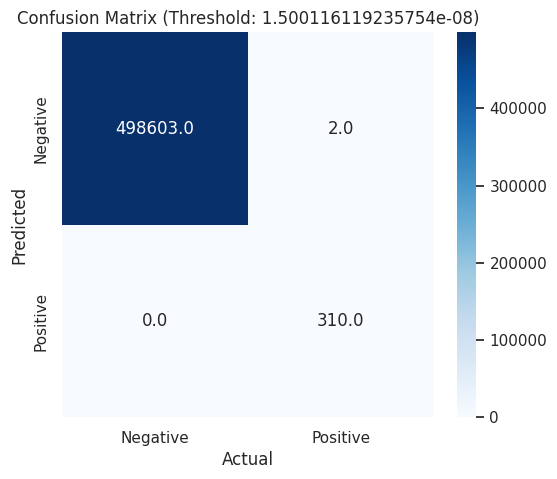

In [81]:
train_98 = 'strict_98_train.data'
opt_th_98 = find_optimal_threshold(train_98)
evaluate_thresholds(train_98, opt_th_98)

Reading data from file...
Data reading completed.
Computing final metrics with the threshold...
Final results:
Threshold: 1.500116119235754e-08
Accuracy: 1.0000
MCC: 0.9873
TPR (Recall): 0.9873
PPV (Precision): 0.9873
F1 Score: 0.9873
Plotting the confusion matrix...


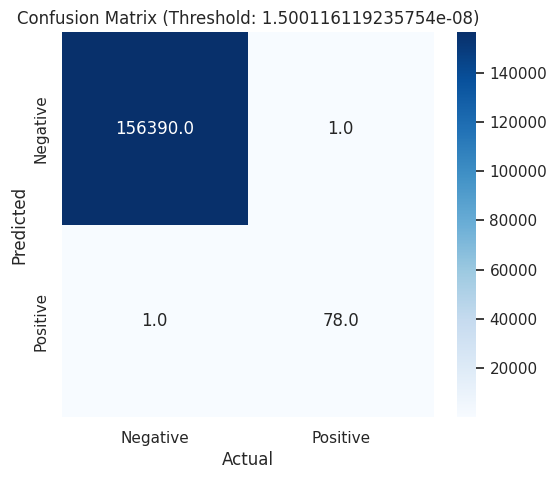

In [82]:
test_98 = 'strict_98_test.data'
evaluate_thresholds(test_98, opt_th_98)

Threshold 0.50000000005: F1 Score = 0.0078
Threshold 0.250000000075: F1 Score = 0.0140
Threshold 0.1250000000875: F1 Score = 0.0269
Threshold 0.06250000009375001: F1 Score = 0.0513
Threshold 0.031250000096875: F1 Score = 0.0988
Threshold 0.0156250000984375: F1 Score = 0.1873
Threshold 0.007812500099218751: F1 Score = 0.3163
Threshold 0.0039062500996093754: F1 Score = 0.5032
Threshold 0.0019531250998046875: F1 Score = 0.6717
Threshold 0.0009765625999023438: F1 Score = 0.8000
Threshold 0.0004882813499511719: F1 Score = 0.8814
Threshold 0.00024414072497558597: F1 Score = 0.9150
Threshold 0.00012207041248779297: F1 Score = 0.9313
Threshold 6.103525624389649e-05: F1 Score = 0.9498
Threshold 3.051767812194824e-05: F1 Score = 0.9585
Threshold 1.525888906097412e-05: F1 Score = 0.9659
Threshold 7.62949453048706e-06: F1 Score = 0.9735
Threshold 3.8147972652435305e-06: F1 Score = 0.9842
Threshold 1.9074486326217653e-06: F1 Score = 0.9873
Threshold 9.537743163108826e-07: F1 Score = 0.9889
Threshol

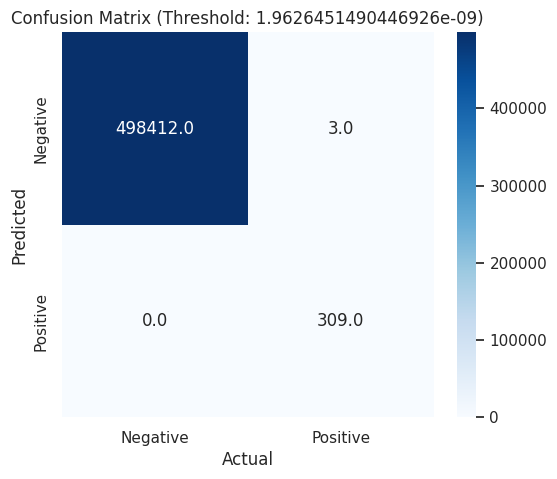

In [83]:
train_80 = 'strict_80_train.data'
opt_th_80 = find_optimal_threshold(train_80)
evaluate_thresholds(train_80, opt_th_80)

Reading data from file...
Data reading completed.
Computing final metrics with the threshold...
Final results:
Threshold: 1.9626451490446926e-09
Accuracy: 1.0000
MCC: 0.9936
TPR (Recall): 0.9873
PPV (Precision): 1.0000
F1 Score: 0.9936
Plotting the confusion matrix...


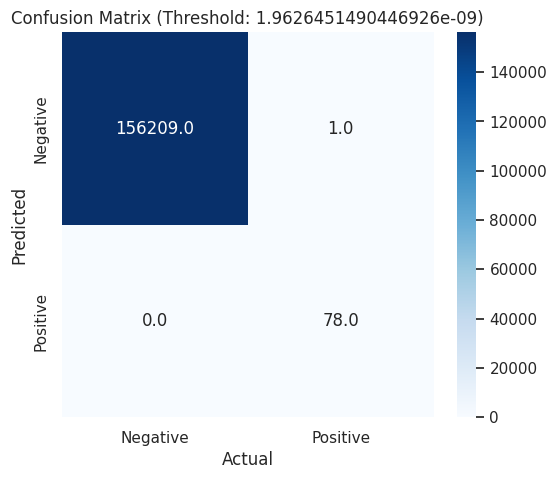

In [84]:
test_80 = 'strict_80_test.data'
evaluate_thresholds(test_80, opt_th_80)